# Guided Project: Visualizing Real World Data

- Find a data set to process: a great place to start looking would be [Awesome Public Data Sets](https://github.com/awesomedata/awesome-public-datasets), [Kaggle Data Sets](https://www.kaggle.com/datasets), or the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). A great new source is the [Google dataset search](https://toolbox.google.com/datasetsearch).
- Perform Preliminary Analysis: use functions like `describe` to help guide you to the correct insight and data visualization.
- Using your data, create a minimum of one scatter plot, one histogram, one box plot and one bar graph (you can add more than one visualization of each type of you choose). Graphs should contain the proper labeling of the x and y axis when appropriate as well as a title for the graph.
- Explain what insight or information is inferred from these visualizations. The explanation should be in the notebook in markdown cells.
- Create a data folder containing your data set.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
data = pd.read_csv('../data/data_p.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,shipmode,sales,quantity,discount,profit,segment,region,state,...,category,orderdate_day,orderdate_weekday,orderdate_month,orderdate_year,shipdate_day,shipdate_weekday,shipdate_month,shipdate_year,preparationtime
0,0,1,First Class,825.174,9,0.30,-117.8820,Corporate,Central,Illinois,...,Furniture,4,Sonntag,9,2016,6,Dienstag,9,2016,2
1,1,2,Standard Class,411.332,4,0.15,-4.8392,Consumer,West,California,...,Furniture,5,Freitag,9,2014,9,Dienstag,9,2014,4
2,2,3,Same Day,411.332,4,0.15,-4.8392,Home Office,West,California,...,Furniture,28,Donnerstag,11,2013,28,Donnerstag,11,2013,0
3,3,4,First Class,241.960,2,0.00,33.8744,Consumer,South,Louisiana,...,Furniture,30,Montag,5,2016,31,Dienstag,5,2016,1
4,4,5,Standard Class,341.960,2,0.00,78.6508,Home Office,East,Rhode Island,...,Furniture,31,Dienstag,12,2013,7,Dienstag,1,2014,7


In [90]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [91]:
data.columns

Index(['shipmode', 'sales', 'quantity', 'discount', 'profit', 'segment',
       'region', 'state', 'subcategory', 'category', 'orderdate_day',
       'orderdate_weekday', 'orderdate_month', 'orderdate_year',
       'shipdate_day', 'shipdate_weekday', 'shipdate_month', 'shipdate_year',
       'preparationtime'],
      dtype='object')

In [92]:
data.describe()

,sales,quantity,discount,profit,orderdate_day,orderdate_month,orderdate_year,shipdate_day,shipdate_month,shipdate_year,preparationtime
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,238.656312,3.807500,0.184523,13.409610,15.644000,7.827500,2014.725500,15.925500,7.771500,2014.740250,3.973500
std,484.803059,2.235216,0.226589,176.418623,8.734148,3.306808,1.126706,8.843868,3.356427,1.133402,1.740705
min,0.444000,1.000000,0.000000,-2929.484500,1.000000,1.000000,2013.000000,1.000000,1.000000,2013.000000,0.000000
25%,17.520000,2.000000,0.000000,-1.965600,8.000000,5.000000,2014.000000,8.000000,5.000000,2014.000000,3.000000
50%,63.479000,3.000000,0.200000,6.215200,16.000000,9.000000,2015.000000,16.000000,9.000000,2015.000000,4.000000
75%,254.545500,5.000000,0.200000,23.652900,23.000000,11.000000,2016.000000,24.000000,11.000000,2016.000000,5.000000
max,9892.740000,14.000000,0.800000,4946.370000,31.000000,12.000000,2016.000000,31.000000,12.000000,2017.000000,7.000000


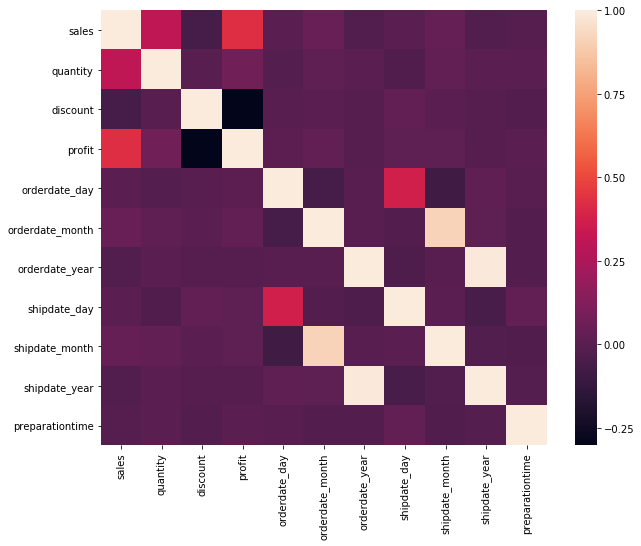

In [93]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr())

The heatmap shows that there are numeric few fields with correlation. Sales are correlated to quantity and profit 
which makes sense as the increase in sales will increase the quanties sold and therefore the profit.
Alos correlated are orderdate_day and shipdate_day; logically, when an order is placed, it will be shipped
within more or leass the same time frame each time, so the gap between both will be similar each time.

In [131]:
#Top correlated items to sales:
data.corr()['sales'].sort_values(ascending=False)[1:6]

profit             0.426825
quantity           0.312279
orderdate_month    0.045233
shipdate_month     0.041759
shipdate_day       0.007464
Name: sales, dtype: float64

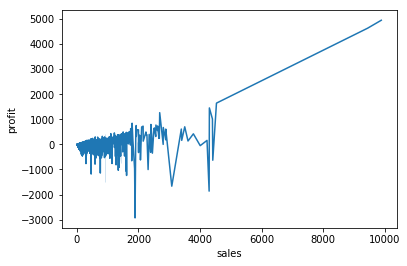

In [140]:
# Line plot1
sns.lineplot(x="sales", y="profit", data=data)

Above line plot shows that there is a lot of variance in profit vs sales until sales amount of each order reach 
the amount of about 5000. Mostly all these transactions generate low profit, no profit or are even generating loss for the company. Only when the sale amount goes above 5000, then the company starts making steady profit and the sales and profit are positively correlated. 
We can filter for those sales below 5k and try to see what's going on there.

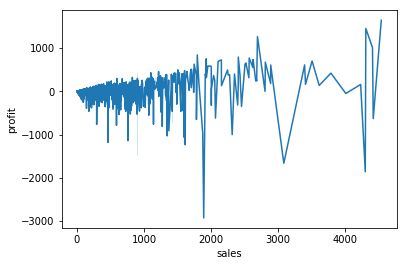

In [144]:
low_sales2 = data[data['sales'] < 5000]
sns.lineplot(x="sales", y="profit", data=low_sales2)

This still doesn't give a lot of understanding about how the data is distributed. It would be better to look at
it with the help of scatter plot and add hue to see what category of products is driving more loss.

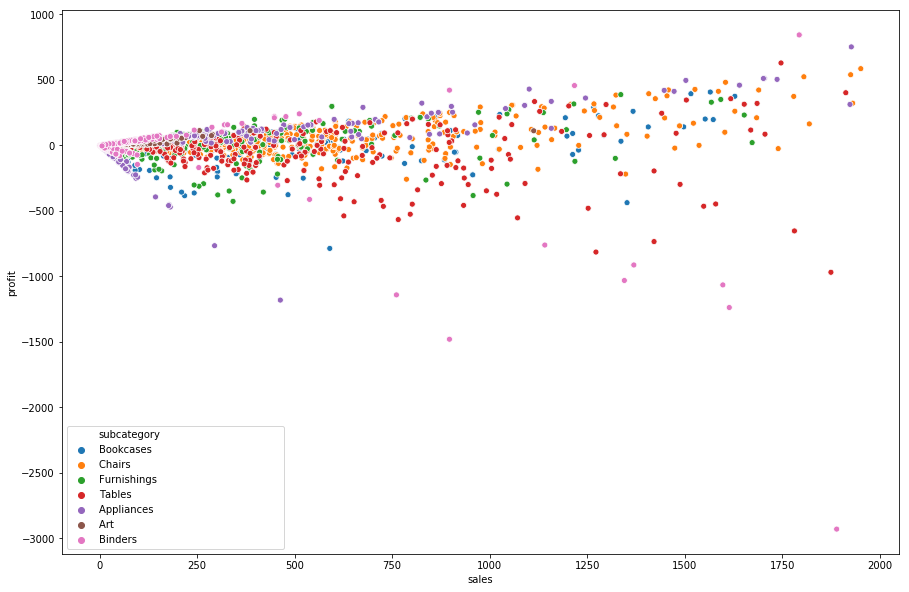

In [156]:
# Scatter plot1:
plt.figure(figsize=(15, 10))

low_sales3 = data[data['sales'] < 2000]
sns.scatterplot(x="sales", y="profit", hue="subcategory", data=low_sales3)

The scatter plot shows that there's no clear pattern to wether a certain subcategory of products drive the loss,
while others generate profit only. So this is not linked to a certain group of product category. We could 
investigate if it's linked to the discount that is given to the clients.

In [243]:
# Scatter plot2:
# Create bins for discounts:

discount_labels = ['0%', '1-20%', '21-40%', '41-60%', 'above 61%']
cutoffs = [-0.01, 0.01, 0.2, 0.4, 0.6, 100]
data['discount_level'] = pd.cut(data['discount'], cutoffs, labels=discount_labels)
data.head()

,shipmode,sales,quantity,discount,profit,segment,region,state,subcategory,category,...,orderdate_weekday,orderdate_month,orderdate_year,shipdate_day,shipdate_weekday,shipdate_month,shipdate_year,preparationtime,DiscountLabel,discount_level
0,First Class,825.174,9,0.30,-117.8820,Corporate,Central,Illinois,Bookcases ...,Furniture,...,Sonntag,9,2016,6,Dienstag,9,2016,2,21-40%,21-40%
1,Standard Class,411.332,4,0.15,-4.8392,Consumer,West,California,Bookcases ...,Furniture,...,Freitag,9,2014,9,Dienstag,9,2014,4,1-20%,1-20%
2,Same Day,411.332,4,0.15,-4.8392,Home Office,West,California,Bookcases ...,Furniture,...,Donnerstag,11,2013,28,Donnerstag,11,2013,0,1-20%,1-20%
3,First Class,241.960,2,0.00,33.8744,Consumer,South,Louisiana,Bookcases ...,Furniture,...,Montag,5,2016,31,Dienstag,5,2016,1,0%,0%
4,Standard Class,341.960,2,0.00,78.6508,Home Office,East,Rhode Island,Bookcases ...,Furniture,...,Dienstag,12,2013,7,Dienstag,1,2014,7,0%,0%


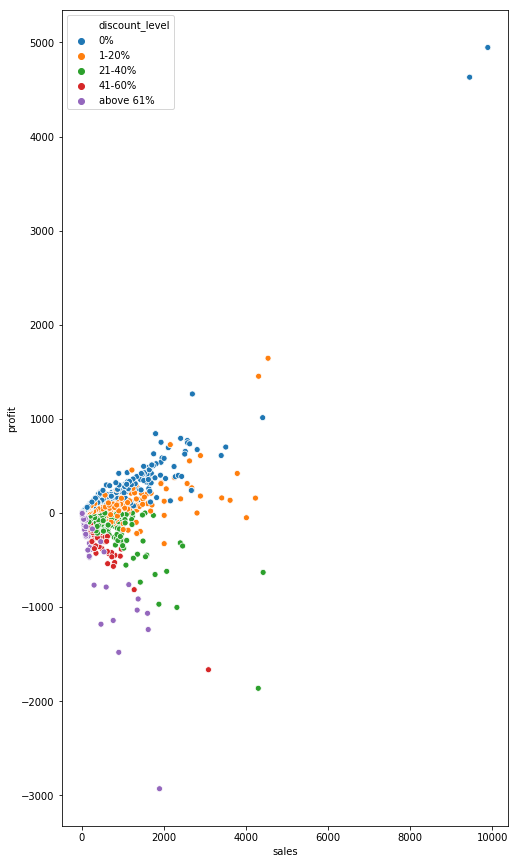

In [250]:
plt.figure(figsize=(8, 15))
sns.scatterplot(x="sales", y="profit", hue="discount_level", data=data)

From the above scatter plot we see that indeed those orders that get higher discount (above 20%) tend to drive more loss than orders with lower discount or no discount at all, which does make sense. The company should maybe review their discount pollicy and asses the client groups that get the high discounts.

Text(0.5, 1.0, 'Sales vs quantity per product category')

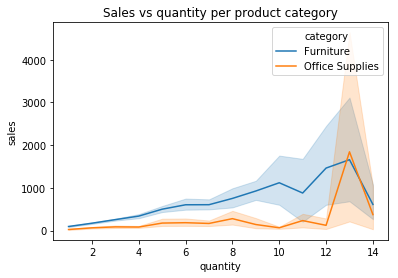

In [179]:
# Line plot2
sns.lineplot(x="quantity", y="sales", hue="category", data=data)
plt.title('Sales vs quantity per product category')

The line plot helps us see better the distribution of data among the two categories.
We see that as the quantity increases for both, the sales go up. The sales go up by a higher rate for Furniture
though. However, there's a big jump for Office Supplies in terms of sales when the quanity reaches 13 items.
We chould investigate this futher to see what type of product is driving this particular jump.

Text(0.5, 1.0, 'Sales vs quantity per Office Supplies subcategory')

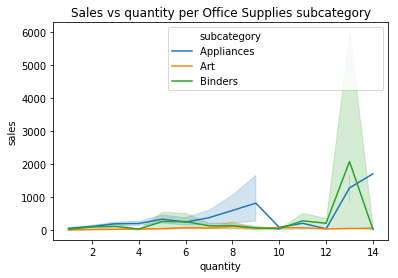

In [98]:
# Linear plot for subcategory when filtered for Office supplies:
off_supplies = data[data['category']=='Office Supplies']
sns.lineplot(x="quantity", y="sales", hue="subcategory", data=off_supplies)
plt.title('Sales vs quantity per Office Supplies subcategory')

From the above graph we see that the jump comes from Binders and Appliances.

Text(0.5, 1.0, 'Total sales per Shipmode')

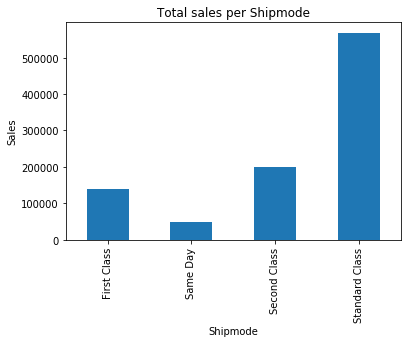

In [180]:
# Bar graph1
data.groupby(['shipmode'])['sales'].sum().plot.bar()
plt.xlabel('Shipmode')
plt.ylabel('Sales')
plt.title('Total sales per Shipmode')

This bar grap helps us to see the sales coming from each shipment mode. Most of the sales are Standar class shipmode, and very few customers opt for Same Day shippment, which supposedly is more expensive.

Text(0.5, 1.0, 'Quantity & Sales per shipmode')

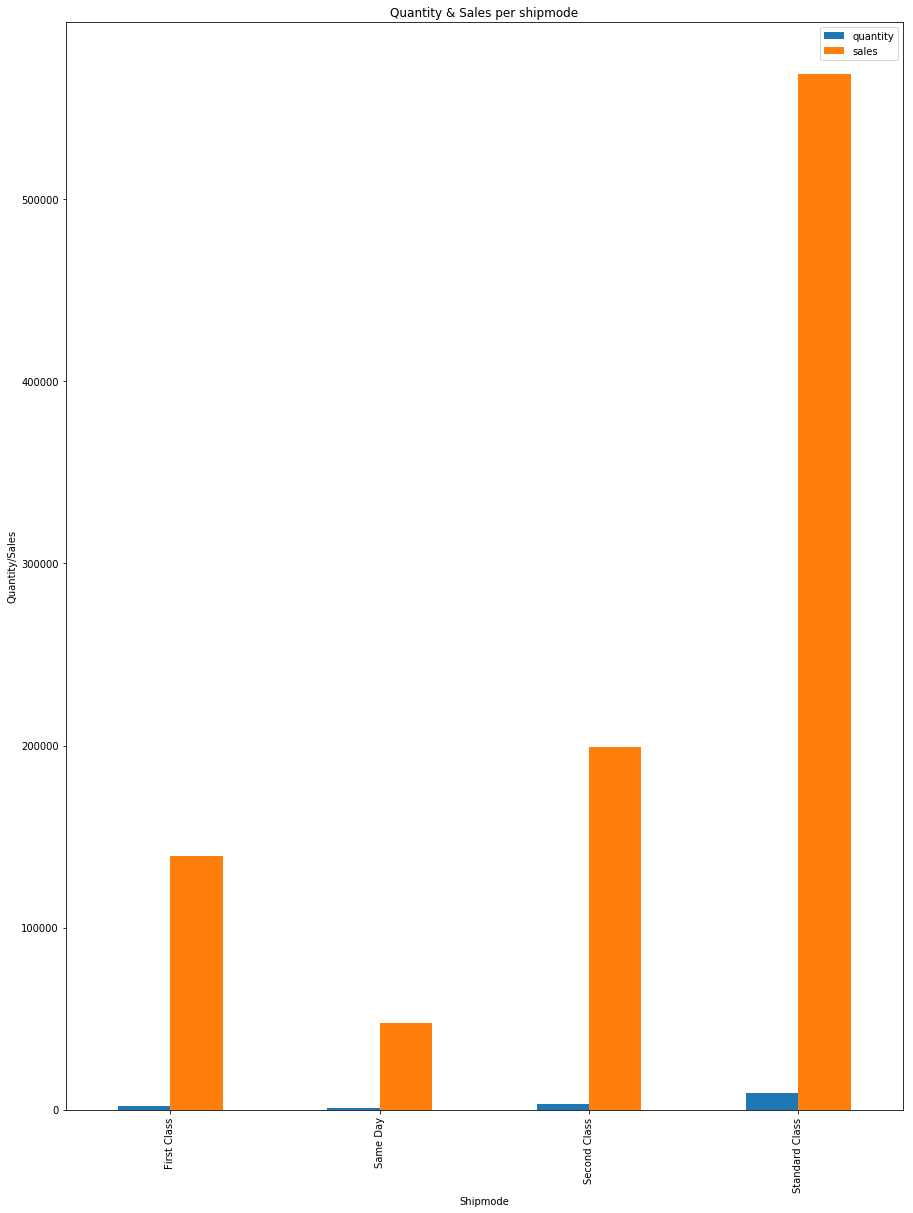

In [219]:
# Bar graph2
shipmode = data[['shipmode', 'quantity', 'sales']].groupby(['shipmode']).agg('sum') 
shipmode.plot.bar(figsize=(15, 20))

plt.xlabel('Shipmode')
plt.ylabel('Quantity/Sales')
plt.title('Quantity & Sales per shipmode')

Obviously Quantity and Sales are correlated and both vary the same vay per Shipmode. This visualisation might not be the most adapted as the quantities are in lower range than sales and it's hard to plot both together. 

Text(0.5, 1.0, 'Discount level per number of orders')

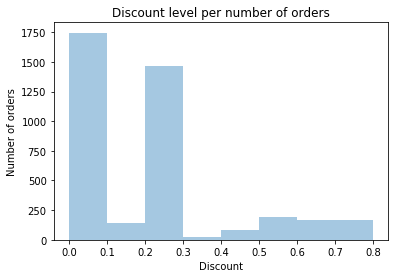

In [99]:
# Histogram
sns.distplot(data['discount'], hist=True, kde=False, bins=8)
plt.xlabel('Discount')
plt.ylabel('Number of orders')
plt.title('Discount level per number of orders')

In [100]:
print(data[data['discount']==0]['discount'].value_counts())
print(data[data['discount']==0.2]['discount'].value_counts())

0.0    1746
Name: discount, dtype: int64
0.2    1247
Name: discount, dtype: int64


The histogram above shows that more than a half of the orders have received a discount; 
the discount that's applied the most is 20%. Quite a number of orders (approx 200 for each discount) 
have received also a discount of 50-70%. We could investigate further which type of costumers receive this 
high discount, or is it related to certain products?

[Text(0, 0, 'Bookcases                                         '),
 Text(0, 0, 'Chairs                                            '),
 Text(0, 0, 'Furnishings                                       '),
 Text(0, 0, 'Tables                                            '),
 Text(0, 0, 'Appliances                                        '),
 Text(0, 0, 'Art                                               '),
 Text(0, 0, 'Binders                                           ')]

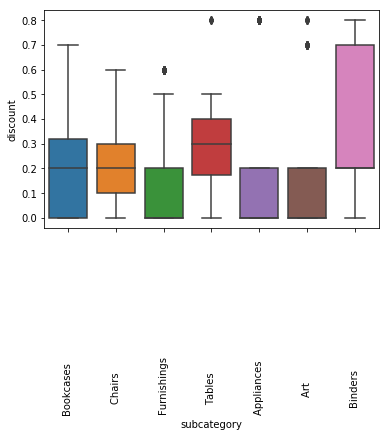

In [124]:
# Box plot 
ax = sns.boxplot(x="subcategory", y="discount", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

The box plot shows that discount distribution varies for different subcategories of products.
We see that Binders tend to get the highest discount range, and also is the subcategory to get the highest discount. Second highest discount goes to Tables, and then to chairs. All of these product groups tend to have at minimum 10-20% discount and rarely get no discount at all. 
Bookcases will get between no discount up to 30%, but will rarely have a higher discount.
Furnishings, Appliances & Art barely ever have a discount higher than 20% and oftentimes don't get any discount.